# *k*-means clustering

Clustering is an unsupervised learning method for grouping data into clusters to detect similarities. *k*-means is a popular method for performing clustering and is implemented in Scikit's [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) class. Let's explore *k*-means clustering using Scikit. Start by importing the tools you need and loading Seaborn in order to dress up your visualizations.

## Use *k*-means to segment customers on two attributes

Now let's use *k*-means clustering to tackle a real-world problem: segmenting customers based on customer data to identify which customers to target with a campaign for a new product or a promotion to increase their purchasing activity. Start by using Pandas to load the dataset.

In [ ]:
import pandas as pd

customers = pd.read_csv('https://raw.githubusercontent.com/mjha91/data/main/fi8092/customers.csv')
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


How many rows and columns does the dataset contain?

In [ ]:
customers.shape

(200, 5)

Perform a quick check to make sure there are no missing values.

In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Extract the annual-income and spending-score values and plot them to see how they relate.

Text(0, 0.5, 'Spending Score')

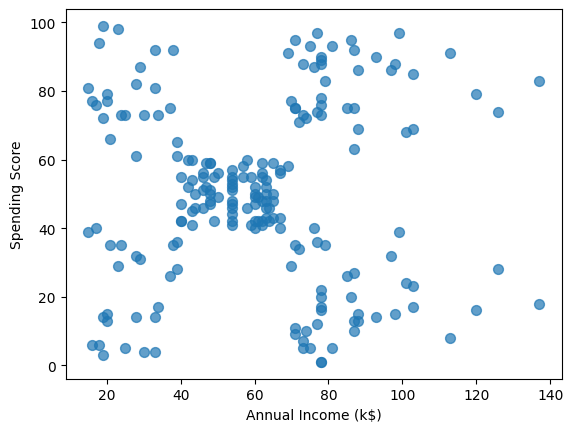

In [ ]:
import matplotlib.pyplot as plt

points = customers.iloc[:, 3:5].values ## annual income and spending
x = points[:, 0]
y = points[:, 1]

plt.scatter(x, y, s=50, alpha=0.7)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')

## Use the elbow method to determine the optimum number of clusters.

How do you determine the "right" number of clusters? One way to do it is with the elbow method, which plots "inertias" (the sum of the squared distances of the data points to the closest cluster center) obtained from `KMeans.inertia_` as a function of cluster counts:

Text(0, 0.5, 'Inertia')

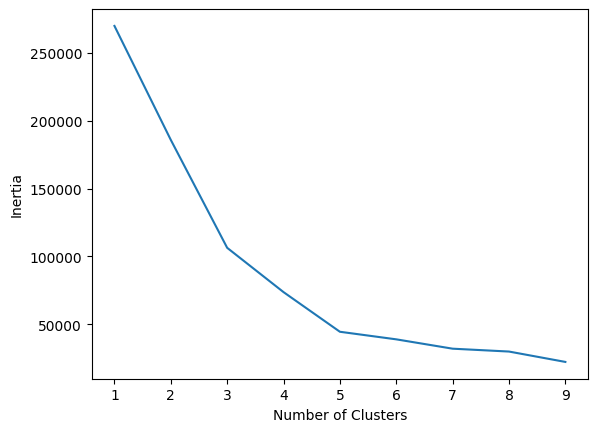

In [ ]:
from sklearn.cluster import KMeans

inertias = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(points)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 10), inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

Looks as if the optimum number of clusters is 5. Therefore, segment the customers using five clusters.

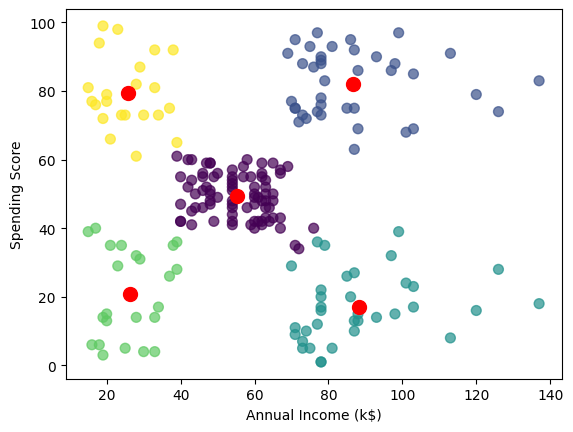

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(points)
predicted_cluster_indexes = kmeans.predict(points)

plt.scatter(x, y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)

Create a DataFrame containing customer data and add a column named "Cluster" with the index of the cluster that each customer falls into.

In [ ]:
df = customers.copy()
df['Cluster'] = kmeans.predict(points)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


Generate a list of customers who fall into the lower-right cluster (customers with high incomes but low spending scores).

In [ ]:
import numpy as np

cluster = kmeans.predict(np.array([[120, 20]]))[0] # Get the cluster index for a customer with a high income and low spending score
clustered_df = df[df['Cluster'] == cluster] # Filter the DataFrame to include only customers in that cluster
clustered_df['CustomerID'].values # Show the customer IDs

array([125, 129, 131, 135, 137, 139, 141, 145, 147, 149, 151, 153, 155,
       157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181,
       183, 185, 187, 189, 191, 193, 195, 197, 199])

These might be great customers to target with a promotion to entice them to buy more of your product. If you were going to roll out a loyalty program instead to reward customers who already buy your product, which cluster (or clusters) would you target?